# Electric Field of a Moving Charge

- **PROGRAM**: Electric field of a moving charge
- **CREATED**: 5/30/2018

In this problem, I plot the electric field of a moving charge for different speeds $\beta = v/c$. The charge is moving along the x-axis.
- In **step 1**, I import a package for plotting in 3 dimensions.
- In **step 2**, I define the contants in the problem (in compatible units, $m$, $s$, $kg$, $C$).
    - For the charge $q$, I use the charge of an electron.
    - $\epsilon_{0}$ is the permittivity of free space.
    - The speed of the charge $\beta$ is a value between 0 and 1, and can be changed to see what happens to the electric field.
    - $c$ is the speed of light.
    - $v$ is velocity of the charge in $\frac{m}{s}$, calculated by $v = \beta c$.
- In **step 3**, I define a function to calculate the magnitude of the electric field. The electric field vector is
$\vec{E}(\vec{r}, t) = \frac{q}{4 \pi \epsilon_{0}} \frac{1 - \beta^{2}}{(1 - \beta^{2}sin^2(\theta))^{3/2}} \frac{\hat{R}}{R^{2}}$, so this function calculates $E(\vec{r}, t) = \frac{q}{4 \pi \epsilon_{0}} \frac{1 - \beta^{2}}{R^{2} (1 - \beta^{2}sin^2(\theta))^{3/2}}$.
- In **step 4**, having calculated the direction vector $\hat{R}$ by hand, by drawing pictures, I define a function to calculate the magnitude of the x-component, y-component, and z-component of the electric field. Since $\hat{R} = (\frac{x - v_{x}t}{ \sqrt{(x - v_{x}t)^{2} + y^{2} + z^{2}} }, \frac{y}{\sqrt{ (x - v_{x}t)^2 + y^{2} + z^{2}} }, \frac{z}{ \sqrt{(x - v_{x}t)^2 + y^{2} + z^{2}} })$, the electric field components are
    - $E_{x} = E(\vec{r}, t) \frac{x - v_{x}t}{ \sqrt{(x - v_{x}t)^{2} + y^{2} + z^{2}} } = (\frac{q}{4 \pi \epsilon_{0}} \frac{1 - \beta^{2}}{R^{2} (1 - \beta^{2}sin^2(\theta))^{3/2}}) \frac{x - v_{x}t}{ \sqrt{(x - v_{x}t)^{2} + y^{2} + z^{2}} }$
    - $E_{y} = E(\vec{r}, t) \frac{y}{ \sqrt{(x - v_{x}t)^{2} + y^{2} + z^{2}} } = (\frac{q}{4 \pi \epsilon_{0}} \frac{1 - \beta^{2}}{R^{2} (1 - \beta^{2}sin^2(\theta))^{3/2}}) \frac{y}{ \sqrt{(x - v_{x}t)^{2} + y^{2} + z^{2}} }$
    - $E_{z} = E(\vec{r}, t) \frac{z}{ \sqrt{(x - v_{x}t)^{2} + y^{2} + z^{2}} } = (\frac{q}{4 \pi \epsilon_{0}} \frac{1 - \beta^{2}}{R^{2} (1 - \beta^{2}sin^2(\theta))^{3/2}}) \frac{z}{ \sqrt{(x - v_{x}t)^{2} + y^{2} + z^{2}} }$
- In **step 5**, I plot the electric field at time $t = 0.000000005$ seconds for the moving charge. The time was chosen so that the charge, which is moving close to the speed of light, has not moved very far from the origin outside my chosen plot range. The magnitude of the electric field is highly exaggerated, so that the vectors are visible. (Each component is multiplied by $10^{11}$ $\frac{N}{C}$.)

### 1 - Import Packages

In [6]:
import numpy as np
import matplotlib.pylab as plt
#Import 3-dimensional plotting package.
from mpl_toolkits.mplot3d import axes3d

### 2 - Define Constants

To see what happens when the speed $\beta$ of the charge changes, modify the value of `beta` below.

In [7]:
#Define constants - charge of an electron, permittivity of free space, velocity relative to speed of light.
q = 1.602 * 10**(-19)
e_0 = 8.854 * 10**(-12)

beta = 0.95
c = 2.997925 * 10**8
v = beta * c

### 3 - Calculate Total Electric Field Magnitude

By drawing the vectors in the problem, and relevant triangles, calculate the magnitude of the electric field $E(x, y, z, t)$ at a point $(x, y, z)$ for a certain time $t$. Define a function that will do this calculation for any point in space and at any time.

In [8]:
#Define magnitude of electric field as a function.
def E(x, y, z, t):
    r = np.sqrt(x**2 + y**2 + z**2)
    R = np.sqrt(r**2 + (v*t)**2 - 2 * r * (v*t) * x/np.sqrt(x**2 + y**2 + z**2))
    sin_theta = np.sqrt(y**2 + z**2) / R
    return q/(4*np.pi*e_0) * ((1 - beta**2)/(R**2 * (1 - beta**2 * sin_theta**2)**(3/2)))

### 4 - Calculate Electric Field Components' Magnitude

In [9]:
#Define magnitude of electric field in x, y, and z directions.
def E_x(x, y, z, t):
    return E(x, y, z, t) * (x - v*t)/np.sqrt((x - v*t)**2 + y**2 + z**2)
def E_y(x, y, z, t):
    return E(x, y, z, t) * (y)/np.sqrt((x - v*t)**2 + y**2 + z**2)
def E_z(x, y, z, t):
    return E(x, y, z, t) * (z)/np.sqrt((x - v*t)**2 + y**2 + z**2)

### 5 - Plot Electric Field in Three Dimensions

The magnitude of the electric field is exaggerated so that it is visible.

/Applications/Programming/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.
/Applications/Programming/anaconda3/lib/python3.6/site-packages/mpl_toolkits/mplot3d/axes3d.py:2689: RuntimeWarning: invalid value encountered in greater
  mask = norm > 0


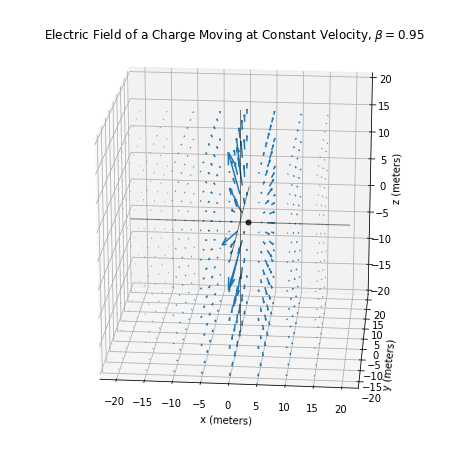

In [10]:
#Make a three-dimensional plot of the electric field.
fig = plt.figure(figsize = (8, 8))
ax = fig.gca(projection = '3d')

#Make a grid of points where vectors of the vector field are placed.
x_lim = 20
y_lim = 20
z_lim = 20
n = 5
X, Y, Z = np.meshgrid(np.arange(-x_lim, x_lim, n), 
                      np.arange(-y_lim, y_lim, n), 
                      np.arange(-z_lim, z_lim, n))

#Choose a time (in seconds) to plot the electric field of the charge, where the charge is at the origin for t = 0.
t = 0.000000005

#Write the vector components. Multiply by 10^11 so that the vectors are visible.
U = E_x(X, Y, Z, t) * 10**11
V = E_y(X, Y, Z, t) * 10**11
W = E_z(X, Y, Z, t) * 10**11

#Plot the vector field.
ax.quiver(X, Y, Z, U, V, W)

#Plot the x-axis, y-axis, and z-axis
X_0 = 1000*[0]
Y_0 = 1000*[0]
Z_0 = 1000*[0]

X_axis = np.linspace(-x_lim, x_lim, 1000)
ax.plot(X_axis, Y_0, Z_0, color = 'k', linewidth = 1, alpha = 0.5)
Y_axis = np.linspace(-y_lim, y_lim, 1000)
ax.plot(X_0, Y_axis, Z_0, color = 'k', linewidth = 1, alpha = 0.5)
Z_axis = np.linspace(-z_lim, z_lim, 1000)
ax.plot(X_0, Y_0, Z_axis, color = 'k', linewidth = 1, alpha = 0.5)

#Plot the charge, moving along the x-axis.
ax.plot([v*t], [0], [0], marker = 'o', markerfacecolor = 'k', markeredgecolor = 'None', alpha = 0.8)

#Adjust the viewing angle of the plot.
ax.view_init(elev = 20, azim = 275)

#Label the plot.
ax.set_xlabel('x (meters)')
ax.set_ylabel('y (meters)')
ax.set_zlabel('z (meters)')

ax.set_title('Electric Field of a Charge Moving at Constant Velocity, $\\beta = 0.95$')

#plt.savefig('Electric Field of a Charge Moving at Constant Velocity, B = 0.95.png')
plt.show()